# Enkle grafer i Altair

- **Data**, **Marks**, og **Encodings**: de tre grunnlegende brikkene til Altair chart

- **Encoding Types**: ``Q`` (quantitative), ``N`` (nominal), ``O`` (ordinal), ``T`` (temporal), som styrer den visuelle representasjonen

Vi starter med å importere Altair

In [6]:
import altair as alt

## Det grunnlegende med et Altair plot

De tre grunnlegende brikkene til Altair chart **data**, **mark**, og **encoding**.

Og formatet der de blir brukt ser slik ut:

```python
alt.Chart(data).mark_point().encode(
    encoding_1='column_1',
    encoding_2='column_2',
    # etc.
)
```

### Data

Altair er bygd på [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
Her bruker vi datasettet, cars, fra [vega_datasets](https://github.com/altair-viz/vega_datasets)-pakken:

In [4]:
from vega_datasets import data
df = data.cars()

df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Data som skal brukes med Altair må være i et ryddig format [tidy format](http://vita.had.co.nz/papers/tidy-data.html); med andre ord:

- hver **rad** er en observasjon
- hver **kolonne** er en variabel

Se [Altair sin datadokumentasjon](https://altair-viz.github.io/user_guide/data.html) for mer info.

### *Chart*-objektet

In [7]:
chart = alt.Chart(df)

Nå så inneholder chart-variabelen kun en representasjon av dataframen og litt metadata i JSON-format.

### Mark

For å plott trenger vi en type *mark* som vi ønsker skal representere dataene.
Vi kan f.eks. velge ``point``-mark til å representere hvert datapunkt i datasettet:

In [12]:
alt.Chart(df).mark_point()

Resultatet blir mange punkter over hverandre og gir ikke så mye informasjon 😄

Det er mange **mark** og velge mellom

* ``mark_point()`` 
* ``mark_circle()``
* ``mark_square()``
* ``mark_line()``
* ``mark_area()``
* ``mark_bar()``
* ``mark_tick()``

Du får den fulle lista med ``mark_*``-typer med tab-completion:

    alt.Chart.mark_
    
etterfulgt av tab

In [7]:
# Prøv her


### Encodings

Dette steget gjør at vi kan bestemme hvordan vær kolonne i dataframen skal bli visualisert.
En liste med de mest brukte:

* ``x``: x-axis value
* ``y``: y-axis value
* ``color``: color of the mark
* ``opacity``: transparency/opacity of the mark
* ``shape``: shape of the mark
* ``size``: size of the mark
* ``row``: row within a grid of facet plots
* ``column``: column within a grid of facet plots

For komplett liste se [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

I det første eksempelet deler vi opp kollonen, Origin, på y-aksen. Det er opprinnelseslandet til bilene i datasettet

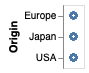

In [18]:
alt.Chart(df).mark_point().encode(
    y='Origin'
)

Plottet blir mer interessant hvis vi deler x-aksen f.eks representerer bensinforbruket.

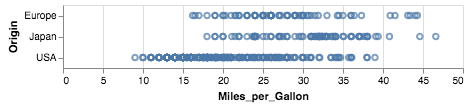

In [10]:
alt.Chart(cars).mark_point().encode(
    y='Origin',
    x='Miles_per_Gallon'
)

Her kan vi se at det er billig bensin i USA og at avgiftspolitikken muligens ikke fremmer miljøtiltak.

Det er mulig å legge til så mange **encoding** som man ønsker.
Her vil man f.eks. ønke se på hvordan den årlige utviklingen på effektiviteten på motorene til bildene 
Så la oss sette ulik farge på punktene til å representere *Origin*, og plottet *Miles_per_gallon* mot *Year*:

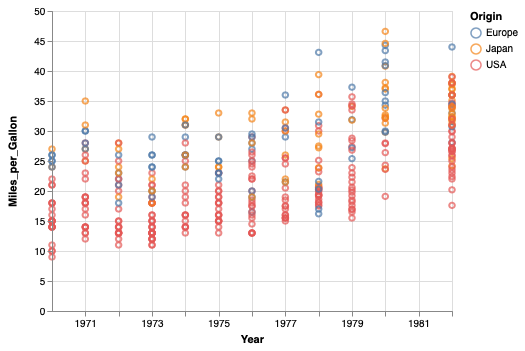

In [20]:
alt.Chart(df).mark_point().encode(
    color='Origin',
    y='Miles_per_Gallon',
    x='Year'
)

Det er gamle data, men man ser hverfall at trenden går riktig vei.

Vi kan også plotte utviklingen som linjer.

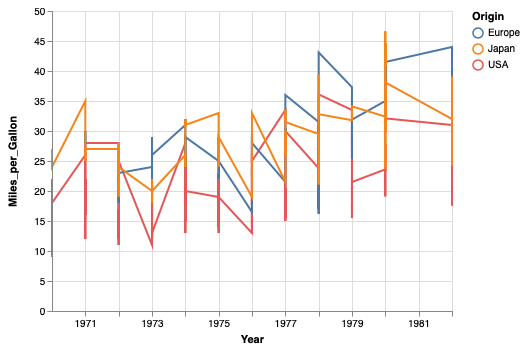

In [23]:
alt.Chart(df).mark_line().encode(
    color='Origin',
    y='Miles_per_Gallon',
    x='Year'
)

Problemet nå er at vi har så mange biler per *Origin*. Det kan løses ved å se på gjennomsnittet, sum eller annet på bensinforbruket per *Origin*

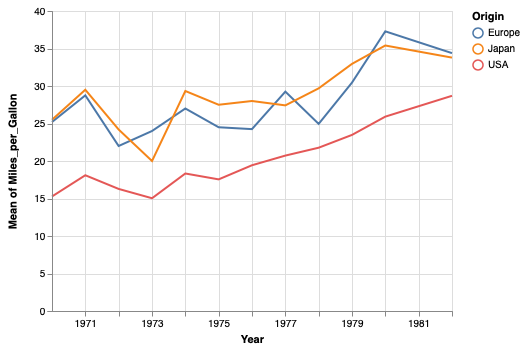

In [35]:
alt.Chart(df).mark_line().encode(
    color='Origin',
    y='mean(Miles_per_Gallon)',
    x='Year'
)

Til dere som har S2:
Vi kan også se på kvartilbredden.

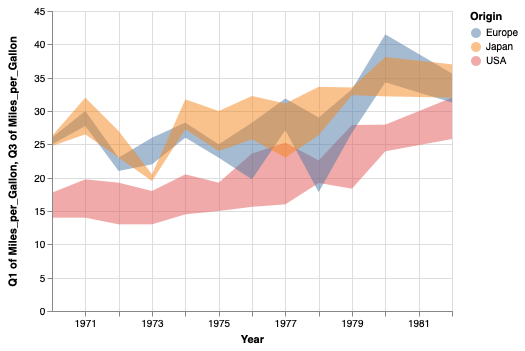

In [52]:
alt.Chart(df).mark_area(opacity=0.5).encode(
    color='Origin',
    y='q1(Miles_per_Gallon)',
    y2='q3(Miles_per_Gallon)',
    x='Year',
)

### Oppgave: Utforsk data

Nå som du kan det grunnlegende (Data, encodings, marks) prøv å lagen noen plots.

Prøv noen av disse f.eks:

- Marks: ``mark_point()``, ``mark_line()``, ``mark_bar()``, ``mark_text()``, ``mark_rect()``...
- Data Columns: ```'Acceleration'``, ``'Cylinders'``, ``'Displacement'``, ``'Horsepower'``, ``'Miles_per_Gallon'``, ``'Name'``, ``'Origin'``, ``'Weight_in_lbs'``, ``'Year'``
- Encodings: ``x``, ``y``, ``color``, ``shape``, ``row``, ``column``, ``opacity``, ``text``, ``tooltip``...

---

## Encoding Types

One of the central ideas of Altair is that the library will **choose good defaults for your data type**.

The basic data types supported by Altair are as follows:

<table>
  <tr>
    <th>Datatype</th>
    <th>Kode</th>
    <th>Forklaring</th>
  </tr>
  <tr>
    <td>kvantitativ</td>
    <td>Q</td>
    <td>En numerisk mengde (reell verdi)</td>
  </tr>
  <tr>
    <td>nominell</td>
    <td>N</td>
    <td>Navn / uordnet kategori</td>
  </tr>
  <tr>
    <td>orden</td>
    <td>O</td>
    <td>Ordna kategori</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Dato/tid</td>
  </tr>
</table>

Altair prøver automatisk å velge riktig hvis du ikke velger selv.

Oppgave:

- Hvilken datatype passer best til ``Miles_per_Gallon``?
- Hvilken datatype passer best til ``Origin``?
- Hvilken datatype passer best til ``Cylinders``?

### Oppgave: Legg til datatype

Legg til datatype til *encodings*-a for vært av plottene under (f.eks. ``"Horsepower"`` til ``"Horsepower:Q"``

Blir noen av pllotten bedre?

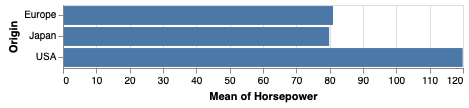

In [48]:
alt.Chart(df).mark_bar().encode(
    y='Origin',
    x='mean(Horsepower):Q'
)

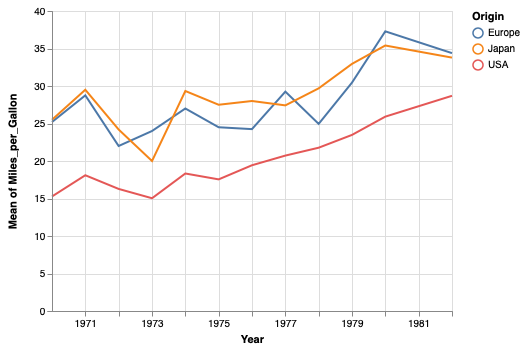

In [46]:
alt.Chart(df).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
    color='Origin'
)

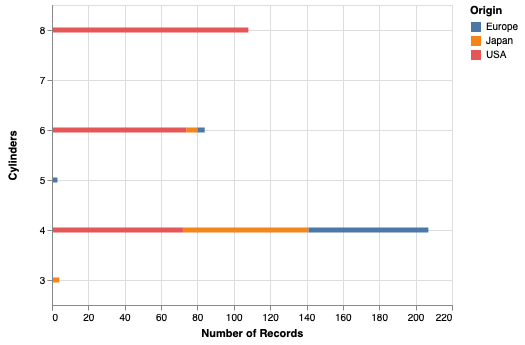

In [45]:
alt.Chart(df).mark_bar().encode(
    y='Cylinders',
    x='count()',
    color='Origin'
)

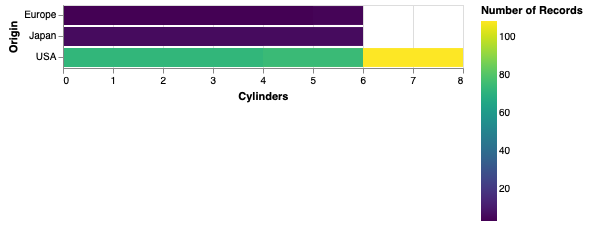

In [47]:
alt.Chart(df).mark_rect().encode(
    x='Cylinders',
    y='Origin',
    color='count()'
)